In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.shape

(404290, 6)

In [4]:
df1=df[:200000]

In [5]:
df1.shape

(200000, 6)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            200000 non-null  int64 
 1   qid1          200000 non-null  int64 
 2   qid2          200000 non-null  int64 
 3   question1     200000 non-null  object
 4   question2     199999 non-null  object
 5   is_duplicate  200000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.2+ MB


In [7]:
df1.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [8]:
df1.duplicated().sum()

0

is_duplicate
0    125525
1     74475
Name: count, dtype: int64
is_duplicate
0    62.7625
1    37.2375
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

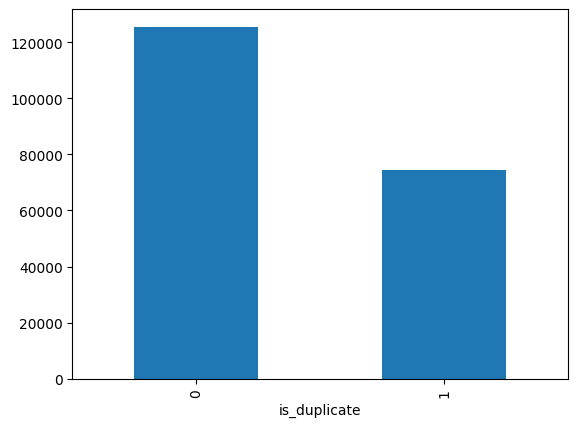

In [9]:
print(df1['is_duplicate'].value_counts())
print((df1['is_duplicate'].value_counts()/df1['is_duplicate'].count())*100)
df1['is_duplicate'].value_counts().plot(kind='bar')


In [10]:
##repeated questions
qid=pd.Series(df1['qid1'].tolist()+df1['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])


Number of unique questions 301630
Number of questions getting repeated 47905


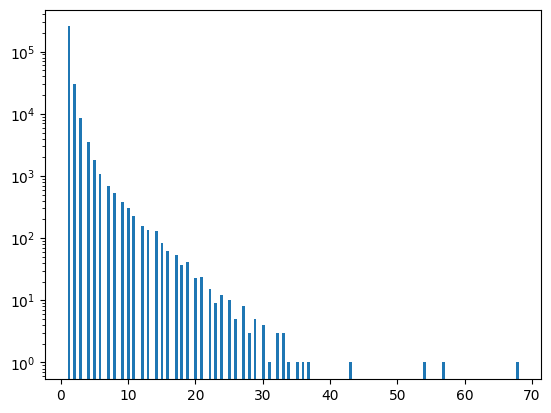

In [11]:
#repeated questions histogram
plt.hist(qid.value_counts().values,bins= 160)
plt.yscale('log')
plt.show()

In [12]:
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [13]:
def preprocess(q):
    q= str(q).lower().strip()
    # replace certain special characters with thier string
    q= q.replace('%','percentage')
    q= q.replace('$','dollar')
    q= q.replace('@','at')
    q= q.replace('?','at')
    q= q.replace('.','at')
    #the pattern 'math'appears almost 800 time in datasets
    q=q.replace('[math]','')
    #replace some  numbers eith string equivalents
    q = q.replace(',000,000,000','b')
    q = q.replace(',000,000','m')
    q = q.replace(',000','k')
    q = re.sub(r'([0-9]+)000000000',r'\1b',q)
    q = re.sub(r'([0-9]+)000000',r'\1m',q)
    q = re.sub(r'([0-9]+)000',r'\1k',q)
    q = re.sub(r",", " ", q)
    q = re.sub(r"\.", " ", q)
    q = re.sub(r"!", " ! ", q)
    q = re.sub(r"\/", " ", q)
    q = re.sub(r"\^", " ^ ", q)
    q = re.sub(r"\+", " + ", q)
    q = re.sub(r"\-", " - ", q)
    q = re.sub(r"\=", " = ", q)
    q = re.sub(r"'", " ", q)
    q = re.sub(r"(\d+)(k)", r"\g<1>000", q)
    q = re.sub(r":", " : ", q)
    q = re.sub(r" e g ", " eg ", q)
    q = re.sub(r" b g ", " bg ", q)
    q = re.sub(r" u s ", " american ", q)
    q = re.sub(r"\0s", "0", q)
    q = re.sub(r" 9 11 ", "911", q)
    q = re.sub(r"e - mail", "email", q)
    q = re.sub(r"j k", "jk", q)
    q = re.sub(r"\s{2,}", " ", q)
      #removing HTML tags
    q= BeautifulSoup(q)
    q= q.get_text()
    #removing punctuation
    q=re.sub(r'[^\w\s]', '', q)
    return q

In [14]:
df1['question1']= df1['question1'].apply(preprocess)

In [15]:
df1['question2']= df1['question2'].apply(preprocess)

In [16]:
df1['question2'][1]

'what would happen if the indian government stole the kohinoor koh  i  noor diamond backat'

In [17]:
df1['question2'][5]

'i m a triple capricorn sun moon and ascendant in capricorn what does this say about meat'

In [18]:
df1['question1'][1]

'what is the story of kohinoor koh  i  noor diamondat'

In [19]:
df1['question1'][5]

'astrology  i am a capricorn sun cap moon and cap risingatatatwhat does that say about meat'

In [20]:
import nltk

In [21]:
print(df1['question1'].apply(type).value_counts())


question1
<class 'str'>    200000
Name: count, dtype: int64


In [22]:
import contractions

def expand_contractions_in_list(data):
    """
    Expands contractions in a list of strings or a single string.

    Parameters:
        data: The input, which could be a list of strings, a single string, or other types.

    Returns:
        Processed data with contractions expanded.
    """
    if isinstance(data, list):  # If it's a list, process each string
        return [contractions.fix(item) if isinstance(item, str) else item for item in data]
    elif isinstance(data, str):  # If it's a single string, process directly
        return contractions.fix(data)
    return data  # Return as-is for other types (e.g., None)

In [23]:
df1['question2'][22122]

'how do i reset my gmail password when i don t remember my recovery informationat'

In [24]:
df1['question1'][22122]

'how can you recover an gmail account without any informationat'

In [25]:
df1['question1']= df1['question1'].apply(expand_contractions_in_list)

In [26]:
df1['question2']= df1['question2'].apply(expand_contractions_in_list)

In [27]:
df1['question2'][22122]

'how do i reset my gmail password when i don t remember my recovery informationat'

In [28]:
text_list = [
    "I can't believe it's already 5 o'clock!",
    "You're going to love this.",
    "It's already 5 o'clock."
]
expand_contractions_in_list(text_list)

['I cannot believe it is already 5 of the clock!',
 'You are going to love this.',
 'It is already 5 of the clock.']

In [29]:
df1['q1_len']=df1['question1'].str.len()
df1['q2_len']=df1['question2'].str.len()

In [30]:
df1['q1_new_words']=df1['question1'].apply(lambda row: len(row.split(' ')))
df1['q2_new_words']=df1['question2'].apply(lambda row: len(row.split(' ')))
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_new_words,q2_new_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,67,58,14,12
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,52,89,12,17
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,74,60,14,10
3,3,7,8,why am i mentally very lonelyat how can i solv...,find the remainder when 23 24 math is divided...,0,52,57,11,13
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt waterat,0,75,40,13,7


In [31]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Store processed questions (without stopwords and stemmed)
stemmer = PorterStemmer()
STOP_WORDS = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = [stemmer.stem(word) for word in text.split() if word not in STOP_WORDS]
    return ' '.join(tokens)

df1['question1'] = df1['question1'].apply(preprocess_text)
df1['question2'] = df1['question2'].apply(preprocess_text)


In [32]:
df1['question2'][22122]

'reset gmail password rememb recoveri informationat'

In [33]:
df1['question2'][100000] 

'process get surgic resid uk complet mbb indiaat'

In [34]:
def common_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(' ')))
    return len(w1 & w2)

In [35]:
df1['word_common']=df1.apply(common_words,axis=1)
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_new_words,q2_new_words,word_common
0,0,1,2,step step guid invest share market indiaat,step step guid invest share marketat,0,67,58,14,12,4
1,1,3,4,stori kohinoor koh noor diamondat,would happen indian govern stole kohinoor koh ...,0,52,89,12,17,3
2,2,5,6,increas speed internet connect use vpnat,internet speed increas hack dnsat,0,74,60,14,10,3
3,3,7,8,mental lonelyat solv itat,find remaind 23 24 math divid 24 23at,0,52,57,11,13,0
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt waterat,0,75,40,13,7,1


In [36]:
def total_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(' ')))
    return (len(w1) + len(w2))

In [37]:
df1['total_word']=df1.apply(total_words,axis=1)
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_new_words,q2_new_words,word_common,total_word
0,0,1,2,step step guid invest share market indiaat,step step guid invest share marketat,0,67,58,14,12,4,11
1,1,3,4,stori kohinoor koh noor diamondat,would happen indian govern stole kohinoor koh ...,0,52,89,12,17,3,15
2,2,5,6,increas speed internet connect use vpnat,internet speed increas hack dnsat,0,74,60,14,10,3,11
3,3,7,8,mental lonelyat solv itat,find remaind 23 24 math divid 24 23at,0,52,57,11,13,0,11
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt waterat,0,75,40,13,7,1,15


In [38]:
df1['word_share']=round(df1['word_common']/df1['total_word'],2)
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_new_words,q2_new_words,word_common,total_word,word_share
0,0,1,2,step step guid invest share market indiaat,step step guid invest share marketat,0,67,58,14,12,4,11,0.36
1,1,3,4,stori kohinoor koh noor diamondat,would happen indian govern stole kohinoor koh ...,0,52,89,12,17,3,15,0.20
2,2,5,6,increas speed internet connect use vpnat,internet speed increas hack dnsat,0,74,60,14,10,3,11,0.27
3,3,7,8,mental lonelyat solv itat,find remaind 23 24 math divid 24 23at,0,52,57,11,13,0,11,0.00
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt waterat,0,75,40,13,7,1,15,0.07


In [39]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def fetch_token_features_with_stemming(row):
    q1 = row['question1']
    q2 = row['question2']
    SAFE_DIV = 0.0001

    STOP_WORDS = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    token_features = [0.0] * 8

    # Tokenize and stem
    q1_tokens = [stemmer.stem(word) for word in q1.split()]
    q2_tokens = [stemmer.stem(word) for word in q2.split()]

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    # Get the stopwords in questions
    q1_stop = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopword from question pairs
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopword from question pairs
    common_stop_count = len(q1_stop.intersection(q2_stop))

    # Get the common token from question pairs
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    # Compute token features
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stop), len(q2_stop)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both questions is the same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both questions is the same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [40]:
token_features = df1.apply(fetch_token_features_with_stemming,axis = 1)

df1['cwc_min']  = list(map(lambda x:x[0],token_features))
df1['cwc_max']  = list(map(lambda x:x[1],token_features))
df1['csc_min']  = list(map(lambda x:x[2],token_features))
df1['csc_max']  = list(map(lambda x:x[3],token_features))
df1['ctc_min']  = list(map(lambda x:x[4],token_features))
df1['ctc_max']  = list(map(lambda x:x[5],token_features))
df1['last_word_eq']  = list(map(lambda x:x[6],token_features))
df1['first_word_eq']  = list(map(lambda x:x[7],token_features))

In [41]:
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_new_words,q2_new_words,...,total_word,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,step step guid invest share market indiaat,step step guid invest share marketat,0,67,58,14,12,...,11,0.36,0.799984,0.666656,0.0,0.0,0.666656,0.571420,0.0,1.0
1,1,3,4,stori kohinoor koh noor diamondat,would happen indian govern stole kohinoor koh ...,0,52,89,12,17,...,15,0.20,0.599988,0.299997,0.0,0.0,0.599988,0.299997,0.0,0.0
2,2,5,6,increas speed internet connect use vpnat,internet speed increas hack dnsat,0,74,60,14,10,...,11,0.27,0.599988,0.499992,0.0,0.0,0.599988,0.499992,0.0,0.0
3,3,7,8,mental lonelyat solv itat,find remaind 23 24 math divid 24 23at,0,52,57,11,13,...,11,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt waterat,0,75,40,13,7,...,15,0.07,0.199996,0.099999,0.0,0.0,0.199996,0.099999,0.0,0.0


In [42]:
import distance
def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    length_features=[0.0]*8
    #converting the sentence into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features


    #absoloute length features
    length_features[0]=abs(len(q1_tokens) - len(q2_tokens))

    #avg token length of both question
    length_features[1]=(len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1,q2))
    if  strs:
        length_features[2] = len(strs[0])/(min(len(q1),len(q2))+1)
    else:
        length_features[2] = 0
    return length_features


In [43]:
length_features = df1.apply(fetch_length_features,axis = 1)
df1['abs_len_diff']=list(map(lambda x:x[0],length_features))
df1['mean_len']=list(map(lambda x:x[1],length_features))
df1['longest_substr_ratio']=list(map(lambda x:x[2],length_features))


In [44]:
#fuzzy features
from fuzzywuzzy import fuzz
def fetch_fuzzy_features(row):
    q1 = row.get('question1','')
    q2 = row.get('question2','')

    fuzzy_features = [0.0]*4
    #fuzzy ratio
    fuzzy_features[0] = fuzz.ratio(q1,q2)

     #fuzzy partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

     #fuzzy token sort ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

     #fuzzy token set ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [45]:
fuzzy_features = df1.apply(fetch_fuzzy_features, axis =1)
#creating  new fuzzy features column for fuzzy features
df1['fuzzy_ratio'] = list(map(lambda x : x[0],fuzzy_features))
df1['fuzzy_partial_ratio'] = list(map(lambda x : x[1],fuzzy_features))
df1['token_sort_ratio'] = list(map(lambda x : x[2],fuzzy_features))
df1['token_set_ratio'] = list(map(lambda x : x[3],fuzzy_features))

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Combine all questions for tokenization
all_questions = df1['question1'].tolist() + df1['question2'].tolist()

# Tokenize and convert to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_questions)

df1['q1_seq']= tokenizer.texts_to_sequences(df1['question1'])
df1['q2_seq'] = tokenizer.texts_to_sequences(df1['question2'])

# Pad sequences to equal length


In [47]:
max_len = 20
df1['q1_padded'] = pad_sequences(df1['q1_seq'], maxlen=max_len, padding='post').tolist()
df1['q2_padded'] = pad_sequences(df1['q2_seq'], maxlen=max_len, padding='post').tolist()


In [48]:
print(df1['q1_padded'].head())
print(df1['q2_padded'].head())


0    [577, 577, 2213, 198, 422, 182, 12, 0, 0, 0, 0...
1    [481, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
2    [117, 404, 492, 472, 4, 0, 0, 0, 0, 0, 0, 0, 0...
3    [991, 4388, 426, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0...
4    [11, 204, 2354, 2036, 1547, 0, 0, 0, 0, 0, 0, ...
Name: q1_padded, dtype: object
0    [577, 577, 2213, 198, 422, 841, 0, 0, 0, 0, 0,...
1    [8, 38, 19, 166, 3576, 816, 0, 0, 0, 0, 0, 0, ...
2    [492, 404, 117, 211, 0, 0, 0, 0, 0, 0, 0, 0, 0...
3    [31, 3583, 2541, 1390, 335, 1661, 1390, 0, 0, ...
4    [1832, 8, 1074, 2036, 780, 0, 0, 0, 0, 0, 0, 0...
Name: q2_padded, dtype: object


In [49]:
df1['q1_padded'][4445]
df1['q2_padded'][4445]


[3796, 138, 1153, 949, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [50]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Extract the feature columns into a NumPy array
features = [
    "q1_len", "q2_len", "q1_new_words", "q2_new_words", 
    "word_common", "total_word", "word_share", 
    "abs_len_diff", "mean_len", "longest_substr_ratio", 
    "fuzzy_ratio", "fuzzy_partial_ratio", "token_sort_ratio",
    "token_set_ratio", "cwc_min", "cwc_max", "csc_min", "csc_max",
    "ctc_min", "ctc_max", "last_word_eq", "first_word_eq"
]

# Convert features to NumPy array
X_features_raw = df1[features].values  # Shape: (num_samples, num_features)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
X_features = scaler.fit_transform(X_features_raw)

# Confirm the shape and scaled range of the features
print(f"Scaled Feature Matrix Shape: {X_features.shape}")
print(f"First Row (Scaled): {X_features[0]}")


Scaled Feature Matrix Shape: (200000, 22)
First Row (Scaled): [0.10771704 0.0490279  0.1031746  0.04435484 0.17391304 0.08823529
 0.72       0.01075269 0.10743802 0.92455646 0.92       0.94
 0.87       0.85       0.79998748 0.66665845 0.         0.
 0.66665972 0.57142398 0.         1.        ]


In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Combine padded sequences and features
###X_tokens = np.array(df['q1_padded'].tolist()) + np.array(df['q2_padded'].tolist())
##X_tokens = np.hstack([np.array(df1['q1_padded'].tolist()), np.array(df1['q2_padded'].tolist())])
X_q1 = np.array(df1['q1_padded'].tolist())  # Shape: (num_samples, max_len)
X_q2 = np.array(df1['q2_padded'].tolist())  


# Labels (use dummy labels for now, replace with actual labels)
y =df1['is_duplicate'].values  # Example: 1 for duplicate, 0 for non-duplicate


In [67]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Parameters
vocab_size = 5000
embedding_dim = 128
max_len = 20
lstm_units = 128
dropout_rate = 0.3
l2_lambda = 0.001

# Input for Question 1
q1_input = Input(shape=(max_len,), name="Q1_Input")
q1_embedding = Embedding(vocab_size, embedding_dim, input_length=max_len)(q1_input)
q1_lstm = LSTM(lstm_units, kernel_regularizer=l2(l2_lambda), return_sequences=True)(q1_embedding)
q1_lstm = LSTM(lstm_units, kernel_regularizer=l2(l2_lambda))(q1_lstm)
q1_lstm = Dropout(dropout_rate)(q1_lstm)

# Input for Question 2
q2_input = Input(shape=(max_len,), name="Q2_Input")
q2_embedding = Embedding(vocab_size, embedding_dim, input_length=max_len)(q2_input)
q2_lstm = LSTM(lstm_units, kernel_regularizer=l2(l2_lambda), return_sequences=True)(q2_embedding)
q2_lstm = LSTM(lstm_units, kernel_regularizer=l2(l2_lambda))(q2_lstm)
q2_lstm = Dropout(dropout_rate)(q2_lstm)

# Input for Additional Features
features_input = Input(shape=(X_features.shape[1],), name="Features_Input")
features_dense = Dense(64, activation="relu", kernel_regularizer=l2(l2_lambda))(features_input)
features_dense = Dropout(dropout_rate)(features_dense)
features_dense = BatchNormalization()(features_dense)

# Combine all inputs
combined = Concatenate()([q1_lstm, q2_lstm, features_dense])
combined = Dense(64, activation="relu", kernel_regularizer=l2(l2_lambda))(combined)
combined = Dropout(dropout_rate)(combined)
combined = BatchNormalization()(combined)

# Output layer
output = Dense(1, activation="sigmoid")(combined)

# Define the model
model = Model(inputs=[q1_input, q2_input, features_input], outputs=output)
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

print(model.summary())



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Q1_Input (InputLayer)         │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Q2_Input (InputLayer)         │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_2 (Embedding)       │ (None, 20, 128)           │         640,000 │ Q1_Input[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_3 (Embedding)       │ (None, 20, 128)           │         640,000 │ Q2_Input[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Features_Input (InputLayer)   │ (None, 22)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ (None, 20, 128)           │         131,584 │ embedding_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_4 (LSTM)                 │ (None, 20, 128)           │         131,584 │ embedding_3[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           1,472 │ Features_Input[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_3 (LSTM)                 │ (None, 128)               │         131,584 │ lstm_2[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_5 (LSTM)                 │ (None, 128)               │         131,584 │ lstm_4[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64)                │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128)               │               0 │ lstm_3[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128)               │               0 │ lstm_5[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 64)                │             256 │ dropout_2[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 320)               │               0 │ dropout[0][0],             │
│                               │                           │                 │ dropout_1[0][0],           │
│                               │                           │                 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 64)                │          20,54

 Total params: 1,828,929 (6.98 MB)

 Trainable params: 1,828,673 (6.98 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [69]:
# Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)

# Model training
history = model.fit(
    [X_q1, X_q2, X_features],
    y,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 979s 380ms/step - accuracy: 0.7218 - loss: 0.6972 - val_accuracy: 0.7901 - val_loss: 0.4502 - learning_rate: 5.0000e-04
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1420s 568ms/step - accuracy: 0.7890 - loss: 0.4423 - val_accuracy: 0.7829 - val_loss: 0.4362 - learning_rate: 5.0000e-04
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1663s 665ms/step - accuracy: 0.7963 - loss: 0.4231 - val_accuracy: 0.7922 - val_loss: 0.4281 - learning_rate: 5.0000e-04
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1116s 430ms/step - accuracy: 0.7993 - loss: 0.4173 - val_accuracy: 0.7940 - val_loss: 0.4218 - learning_rate: 5.0000e-04
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 941s 377ms/step - accuracy: 0.8012 - loss: 0.4128 - val_accuracy: 0.7951 - val_loss: 0.4222 - learning_rate: 5.0000e-04
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 923s 369ms/step - accuracy: 0.8025 - loss: 0.4096 - val_accuracy: 0.7953 - val_loss: 0.4184 - learning_rate: 5.0000e-04
Epoch 7/20
2500/2500 ━━━━

In [85]:
from fuzzywuzzy import fuzz
import numpy as np
import re

# Clean text
def clean_text(text):
    text= text.replace('?',' ')
    text= text.replace('.',' ')
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Feature extraction
def extract_features_v2(q1, q2):
    # Clean questions
    q1_clean = clean_text(q1)
    q2_clean = clean_text(q2)
    
    # Split into words
    q1_words = set(q1_clean.split())
    q2_words = set(q2_clean.split())

    # Length-based features
    q1_len = len(q1_clean.split())
    q2_len = len(q2_clean.split())
    abs_len_diff = abs(q1_len - q2_len)
    mean_len = (q1_len + q2_len) / 2

    # Unique word features
    q1_new_words = len(q1_words - q2_words)
    q2_new_words = len(q2_words - q1_words)

    # Word overlap features
    word_common = len(q1_words & q2_words)
    total_word = len(q1_words | q2_words)
    word_share = word_common / total_word if total_word > 0 else 0

    # Fuzzy matching features
    fuzzy_ratio = fuzz.ratio(q1_clean, q2_clean)
    fuzzy_partial_ratio = fuzz.partial_ratio(q1_clean, q2_clean)
    token_sort_ratio = fuzz.token_sort_ratio(q1_clean, q2_clean)
    token_set_ratio = fuzz.token_set_ratio(q1_clean, q2_clean)

    # Longest common substring ratio
    def longest_substring_ratio(a, b):
        m, n = len(a), len(b)
        dp = [[0] * (n + 1) for _ in range(m + 1)]
        longest = 0
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if a[i - 1] == b[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                    longest = max(longest, dp[i][j])
        return longest / max(m, n) if max(m, n) > 0 else 0

    longest_substr_ratio = longest_substring_ratio(q1_clean, q2_clean)

    # Positional features
    last_word_eq = int(q1_clean.split()[-1] == q2_clean.split()[-1]) if q1_clean and q2_clean else 0
    first_word_eq = int(q1_clean.split()[0] == q2_clean.split()[0]) if q1_clean and q2_clean else 0

    # Create combined word count features
    def count_word_matches(w1, w2):
        w1_set = set(w1)
        w2_set = set(w2)
        return len(w1_set & w2_set) / min(len(w1_set), len(w2_set)) if min(len(w1_set), len(w2_set)) > 0 else 0

    cwc_min = count_word_matches(q1_words, q2_words)
    cwc_max = len(q1_words & q2_words) / max(len(q1_words), len(q2_words)) if max(len(q1_words), len(q2_words)) > 0 else 0

    csc_min = count_word_matches(q1_clean.split(), q2_clean.split())
    csc_max = len(q1_clean.split()) / max(len(q1_clean.split()), len(q2_clean.split())) if max(len(q1_clean.split()), len(q2_clean.split())) > 0 else 0

    ctc_min = count_word_matches(set(q1_clean), set(q2_clean))
    ctc_max = len(set(q1_clean) & set(q2_clean)) / max(len(set(q1_clean)), len(set(q2_clean))) if max(len(set(q1_clean)), len(set(q2_clean))) > 0 else 0

    # Combine all features
    features = [
        q1_len, q2_len, q1_new_words, q2_new_words, 
        word_common, total_word, word_share, 
        abs_len_diff, mean_len, longest_substr_ratio, 
        fuzzy_ratio, fuzzy_partial_ratio, token_sort_ratio, token_set_ratio, 
        cwc_min, cwc_max, csc_min, csc_max,
        ctc_min, ctc_max, last_word_eq, first_word_eq
    ]
    return np.array(features)

# Example questions
example_q0 = "What is the capital of France?"
example_q1 = "Which city is the capital of nepal?"

# Extract features
example_features = extract_features_v2(example_q0, example_q1)
print(f"Extracted Features: {example_features}")


Extracted Features: [ 6.          7.          2.          3.          4.          9.
  0.44444444  1.          6.5         0.54285714 74.         77.
 70.         74.          0.66666667  0.57142857  0.66666667  0.85714286
  0.93333333  0.93333333  0.          0.        ]


In [86]:
# Convert the input questions into sequences
example_q1_seq = tokenizer.texts_to_sequences([example_q0])  # Convert text to sequences
example_q2_seq = tokenizer.texts_to_sequences([example_q1])

# Pad the sequences to match the model's expected input shape
example_q1_padded = pad_sequences(example_q1_seq, maxlen=max_len, padding='post')
example_q2_padded = pad_sequences(example_q2_seq, maxlen=max_len, padding='post')

# Reshape feature array to 2D (1 sample, multiple features)
example_features_reshaped = np.array(example_features).reshape(1, -1)

# Scale the features using the same scaler used during training
example_features_scaled = scaler.transform(example_features_reshaped)

# Ensure all inputs are NumPy arrays and correctly formatted
inputs = [example_q1_padded, example_q2_padded, example_features_scaled]

# Make a prediction using the model
prediction = model.predict(inputs)

# Display the prediction result
print(f"Prediction: {prediction[0][0]:.4f}")
if prediction[0][0] > 0.5:
    print("Duplicate Questions")
else:
    print("Non-Duplicate Questions")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Prediction: 0.3132
Non-Duplicate Questions


In [87]:
from fuzzywuzzy import fuzz
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Initialize stemmer
stemmer = PorterStemmer()

# Load stopwords
stop_words = set(stopwords.words('english'))
# Clean text
def clean_text(text):
    text = text.lower()
    text= text.replace('?',' ')
    text= text.replace('.',' ')
    text= text.replace('AI','Artificial Intelligence')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)
    return text

# Feature extraction
def extract_features_v2(q1, q2):
    # Clean questions
    q1_clean = clean_text(q1)
    q2_clean = clean_text(q2)
    
    # Split into words
    q1_words = set(q1_clean.split())
    q2_words = set(q2_clean.split())

    # Length-based features
    q1_len = len(q1_clean.split())
    q2_len = len(q2_clean.split())
    abs_len_diff = abs(q1_len - q2_len)
    mean_len = (q1_len + q2_len) / 2

    # Unique word features
    q1_new_words = len(q1_words - q2_words)
    q2_new_words = len(q2_words - q1_words)

    # Word overlap features
    word_common = len(q1_words & q2_words)
    total_word = len(q1_words | q2_words)
    word_share = word_common / total_word if total_word > 0 else 0

    # Fuzzy matching features
    fuzzy_ratio = fuzz.ratio(q1_clean, q2_clean)
    fuzzy_partial_ratio = fuzz.partial_ratio(q1_clean, q2_clean)
    token_sort_ratio = fuzz.token_sort_ratio(q1_clean, q2_clean)
    token_set_ratio = fuzz.token_set_ratio(q1_clean, q2_clean)

    # Longest common substring ratio
    def longest_substring_ratio(a, b):
        m, n = len(a), len(b)
        dp = [[0] * (n + 1) for _ in range(m + 1)]
        longest = 0
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if a[i - 1] == b[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                    longest = max(longest, dp[i][j])
        return longest / max(m, n) if max(m, n) > 0 else 0

    longest_substr_ratio = longest_substring_ratio(q1_clean, q2_clean)

    # Positional features
    last_word_eq = int(q1_clean.split()[-1] == q2_clean.split()[-1]) if q1_clean and q2_clean else 0
    first_word_eq = int(q1_clean.split()[0] == q2_clean.split()[0]) if q1_clean and q2_clean else 0

    # Create combined word count features
    def count_word_matches(w1, w2):
        w1_set = set(w1)
        w2_set = set(w2)
        return len(w1_set & w2_set) / min(len(w1_set), len(w2_set)) if min(len(w1_set), len(w2_set)) > 0 else 0

    cwc_min = count_word_matches(q1_words, q2_words)
    cwc_max = len(q1_words & q2_words) / max(len(q1_words), len(q2_words)) if max(len(q1_words), len(q2_words)) > 0 else 0

    csc_min = count_word_matches(q1_clean.split(), q2_clean.split())
    csc_max = len(q1_clean.split()) / max(len(q1_clean.split()), len(q2_clean.split())) if max(len(q1_clean.split()), len(q2_clean.split())) > 0 else 0

    ctc_min = count_word_matches(set(q1_clean), set(q2_clean))
    ctc_max = len(set(q1_clean) & set(q2_clean)) / max(len(set(q1_clean)), len(set(q2_clean))) if max(len(set(q1_clean)), len(set(q2_clean))) > 0 else 0

    # Combine all features
    features = [
        q1_len, q2_len, q1_new_words, q2_new_words, 
        word_common, total_word, word_share, 
        abs_len_diff, mean_len, longest_substr_ratio, 
        fuzzy_ratio, fuzzy_partial_ratio, token_sort_ratio, token_set_ratio, 
        cwc_min, cwc_max, csc_min, csc_max,
        ctc_min, ctc_max, last_word_eq, first_word_eq
    ]
    return np.array(features)

# Example questions
example_q1 = "What is Artificial Intelligence?"
example_q2 = "define Artificial Intelligence."

# Extract features
example_features = extract_features_v2(example_q1, example_q2)
print(f"Extracted Features: {example_features}")


Extracted Features: [  2.           3.           0.           1.           2.
   3.           0.66666667   1.           2.5          0.73913043
  85.         100.          85.         100.           1.
   0.66666667   1.           0.66666667   1.           0.91666667
   1.           0.        ]


In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you used the same tokenizer during training
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([example_q1, example_q2])  # Fit tokenizer on sample questions

# Convert questions to sequences
example_q1_seq = tokenizer.texts_to_sequences([example_q1])
example_q2_seq = tokenizer.texts_to_sequences([example_q2])

# Pad sequences to ensure uniform length
example_q1_padded = pad_sequences(example_q1_seq, maxlen=max_len, padding='post')
example_q2_padded = pad_sequences(example_q2_seq, maxlen=max_len, padding='post')

# Reshape feature array to 2D (1 sample, multiple features)
example_features_reshaped = example_features.reshape(1, -1)

# Scale the features using the same scaler used during training
example_features_scaled = scaler.transform(example_features_reshaped)

# Predict using the trained model
prediction = model.predict(
    [example_q1_padded, example_q2_padded, example_features_scaled]
)

# Display the prediction
print(f"Prediction: {prediction[0][0]:.4f}")
if prediction[0][0] > 0.5:
    print("Duplicate Questions")
else:
    print("Non-Duplicate Questions")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Prediction: 0.6840
Duplicate Questions


In [91]:
from fuzzywuzzy import fuzz
import numpy as np
import re

# Clean text
def clean_text(text):
    text = text.lower()
    text= text.replace('?',' ')
    text= text.replace('.',' ')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

# Feature extraction
def extract_features_v2(q1, q2):
    # Clean questions
    q1_clean = clean_text(q1)
    q2_clean = clean_text(q2)
    
    # Split into words
    q1_words = set(q1_clean.split())
    q2_words = set(q2_clean.split())

    # Length-based features
    q1_len = len(q1_clean.split())
    q2_len = len(q2_clean.split())
    abs_len_diff = abs(q1_len - q2_len)
    mean_len = (q1_len + q2_len) / 2

    # Unique word features
    q1_new_words = len(q1_words - q2_words)
    q2_new_words = len(q2_words - q1_words)

    # Word overlap features
    word_common = len(q1_words & q2_words)
    total_word = len(q1_words | q2_words)
    word_share = word_common / total_word if total_word > 0 else 0

    # Fuzzy matching features
    fuzzy_ratio = fuzz.ratio(q1_clean, q2_clean)
    fuzzy_partial_ratio = fuzz.partial_ratio(q1_clean, q2_clean)
    token_sort_ratio = fuzz.token_sort_ratio(q1_clean, q2_clean)
    token_set_ratio = fuzz.token_set_ratio(q1_clean, q2_clean)

    # Longest common substring ratio
    def longest_substring_ratio(a, b):
        m, n = len(a), len(b)
        dp = [[0] * (n + 1) for _ in range(m + 1)]
        longest = 0
        for i in range(1, m + 1):
            for j in range(1, n + 1):
                if a[i - 1] == b[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                    longest = max(longest, dp[i][j])
        return longest / max(m, n) if max(m, n) > 0 else 0

    longest_substr_ratio = longest_substring_ratio(q1_clean, q2_clean)

    # Positional features
    last_word_eq = int(q1_clean.split()[-1] == q2_clean.split()[-1]) if q1_clean and q2_clean else 0
    first_word_eq = int(q1_clean.split()[0] == q2_clean.split()[0]) if q1_clean and q2_clean else 0

    # Create combined word count features
    def count_word_matches(w1, w2):
        w1_set = set(w1)
        w2_set = set(w2)
        return len(w1_set & w2_set) / min(len(w1_set), len(w2_set)) if min(len(w1_set), len(w2_set)) > 0 else 0

    cwc_min = count_word_matches(q1_words, q2_words)
    cwc_max = len(q1_words & q2_words) / max(len(q1_words), len(q2_words)) if max(len(q1_words), len(q2_words)) > 0 else 0

    csc_min = count_word_matches(q1_clean.split(), q2_clean.split())
    csc_max = len(q1_clean.split()) / max(len(q1_clean.split()), len(q2_clean.split())) if max(len(q1_clean.split()), len(q2_clean.split())) > 0 else 0

    ctc_min = count_word_matches(set(q1_clean), set(q2_clean))
    ctc_max = len(set(q1_clean) & set(q2_clean)) / max(len(set(q1_clean)), len(set(q2_clean))) if max(len(set(q1_clean)), len(set(q2_clean))) > 0 else 0

    # Combine all features
    features = [
        q1_len, q2_len, q1_new_words, q2_new_words, 
        word_common, total_word, word_share, 
        abs_len_diff, mean_len, longest_substr_ratio, 
        fuzzy_ratio, fuzzy_partial_ratio, token_sort_ratio, token_set_ratio, 
        cwc_min, cwc_max, csc_min, csc_max,
        ctc_min, ctc_max, last_word_eq, first_word_eq
    ]
    return np.array(features)

# Example questions
example_q = "What is the capital of france?"
example_q1 = "Which city is the capital of Nepal?"

# Extract features
example_features = extract_features_v2(example_q, example_q1)
print(f"Extracted Features: {example_features}")


Extracted Features: [ 6.          7.          2.          3.          4.          9.
  0.44444444  1.          6.5         0.54285714 74.         77.
 70.         74.          0.66666667  0.57142857  0.66666667  0.85714286
  0.93333333  0.93333333  0.          0.        ]


In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming you used the same tokenizer during training
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([example_q, example_q1])  # Fit tokenizer on sample questions

# Convert questions to sequences
example_q1_seq = tokenizer.texts_to_sequences([example_q])
example_q2_seq = tokenizer.texts_to_sequences([example_q1])

# Pad sequences to ensure uniform length
example_q1_padded = pad_sequences(example_q1_seq, maxlen=max_len, padding='post')
example_q2_padded = pad_sequences(example_q2_seq, maxlen=max_len, padding='post')

# Reshape feature array to 2D (1 sample, multiple features)
example_features_reshaped = example_features.reshape(1, -1)

# Scale the features using the same scaler used during training
example_features_scaled = scaler.transform(example_features_reshaped)

# Predict using the trained model
prediction = model.predict(
    [example_q1_padded, example_q2_padded, example_features_scaled]
)

# Display the prediction
print(f"Prediction: {prediction[0][0]:.4f}")
if prediction[0][0] > 0.5:
    print("Duplicate Questions")
else:
    print("Non-Duplicate Questions")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Prediction: 0.4641
Non-Duplicate Questions


In [84]:
import pickle

# Assuming `model` is your trained Keras model and `scaler` is your feature scaler
with open('quora_duplicate_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [93]:
with open('tokenizer.pkl','wb') as file:
    pickle.dump(tokenizer, file)